In [1]:
%matplotlib inline
%matplotlib nbagg

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
zeta=0.1
omega0 =1.
omegad=1.5
Ap=1
def odeA( t, X):
    x, dotx = X  
    ddotx = -2*zeta*omega0*dotx - omega0**2*x + Ap*np.sin(omegad*t)

    return [dotx, ddotx]

def odeB( X,t):
    x, dotx = X  
    ddotx = -2*zeta*omega0*dotx - omega0**2*x + Ap*np.sin(omegad*t)

    return [dotx, ddotx]

In [4]:
#d f_i / d y_j.
jac=np.array([[0, 1],[-omega0**2, -2*zeta*omega0]])

def jac_fun(X,t):
    return jac

## Solve_ivp

In [13]:
t_span = [0, 100]
X0 = [0., 0.]
t_eval=np.linspace(90,100,1000)

In [14]:
%timeit sol_ivp = solve_ivp(odeA, t_span, X0,  t_eval=t_eval)

17.9 ms ± 136 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Odeint

In [9]:
%timeit sol_ode = odeint(odeB, X0, t_eval, Dfun=jac_fun)


7.74 ms ± 205 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
sol_ivp = solve_ivp(odeA, t_span, X0,  t_eval=t_eval)
sol_ode = odeint(odeB, X0, t_eval, Dfun=jac_fun)

## Plot sol 

<IPython.core.display.Javascript object>


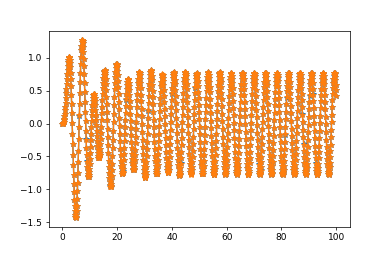

In [12]:
plt.figure()
plt.plot(t_eval, sol_ode[:,0],'*-')
plt.plot(sol_ivp.t, sol_ivp.y[0],'*-')
plt.show()